In [ ]:
# GADM License:
# The data are freely available for academic use and other non-commercial use. Redistribution or commercial use is not allowed without prior permission.
# Using the data to create maps for publishing of academic research articles is allowed. Thus you can use the maps you made with GADM data for figures in articles published by PLoS, Springer Nature, Elsevier, MDPI, etc.
# You are allowed (but not required) to publish these articles (and the maps they contain) under an open license such as CC-BY as is the case with PLoS journals and may be the case with other open access articles.
# Data for the following countries is covered by a different license Austria: Creative Commons Attribution-ShareAlike 2.0 (source: Government of Austria)
# 
# This algorithm was authored by Arturo Conte. While it is distributed freely, credits are appreciated.
# Link to GitHub page: https://github.com/arturocconte


In [30]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import rcParams
from shapely.geometry import Polygon, LineString, Point
from matplotlib.lines import Line2D

In [6]:
### reading geojson data
uf_br0 = gpd.read_file('gadm41_BRA_0.json') ##brasil
uf_br1 = gpd.read_file('gadm41_BRA_2.json') ##cidades
uf_br2 = gpd.read_file('gadm41_BRA_1.json')# #estado

In [25]:
### LIST OF NAMES YOU SHOULD TYPE AT 'estado_contorno'

uf_br2['NAME_1']

0                 Acre
1              Alagoas
2                Amapá
3             Amazonas
4                Bahia
5                Ceará
6      DistritoFederal
7        EspíritoSanto
8                Goiás
9             Maranhão
10          MatoGrosso
11     MatoGrossodoSul
12         MinasGerais
13                Pará
14             Paraíba
15              Paraná
16          Pernambuco
17               Piauí
18        RiodeJaneiro
19    RioGrandedoNorte
20      RioGrandedoSul
21            Rondônia
22             Roraima
23       SantaCatarina
24            SãoPaulo
25             Sergipe
26           Tocantins
Name: NAME_1, dtype: object

In [31]:
estado_contorno = ["SãoPaulo","Paraná","SantaCatarina","RioGrandedoSul",'MinasGerais','RiodeJaneiro','MatoGrosso','MatoGrossodoSul','Bahia','EspíritoSanto']

In [32]:
uf_br = uf_br0[uf_br0['GID_0'].isin(['BRA'])]  ## Brazil
uf_br_sp = uf_br1[uf_br1['GID_1'].isin(['BRA.25_1'])] ## Cities in SãoPaulo dataframe
df_estado = uf_br2[uf_br2["NAME_1"].isin(estado_contorno)] ### States Dataframes, selection from 'estado_contorno'

uf_br_sp_space = uf_br_sp[['NAME_2', 'geometry']]
uf_br_sp_space.head(5)

,NAME_2,geometry
4713,Adamantina,"MULTIPOLYGON (((-51.09230 -21.76580, -51.10360..."
4714,Adolfo,"MULTIPOLYGON (((-49.62840 -21.35440, -49.64150..."
4715,Aguaí,"MULTIPOLYGON (((-46.89210 -22.08600, -46.89170..."
4716,ÁguasdaPrata,"MULTIPOLYGON (((-46.61790 -21.99500, -46.61470..."
4717,ÁguasdeLindóia,"MULTIPOLYGON (((-46.61630 -22.43860, -46.61190..."


In [33]:
points = uf_br_sp_space.copy()
points.geometry = points['geometry'].centroid
# points.head(5)

C:\Users\a.conte\AppData\Local\Temp\ipykernel_21564\2937444089.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points.geometry = points['geometry'].centroid


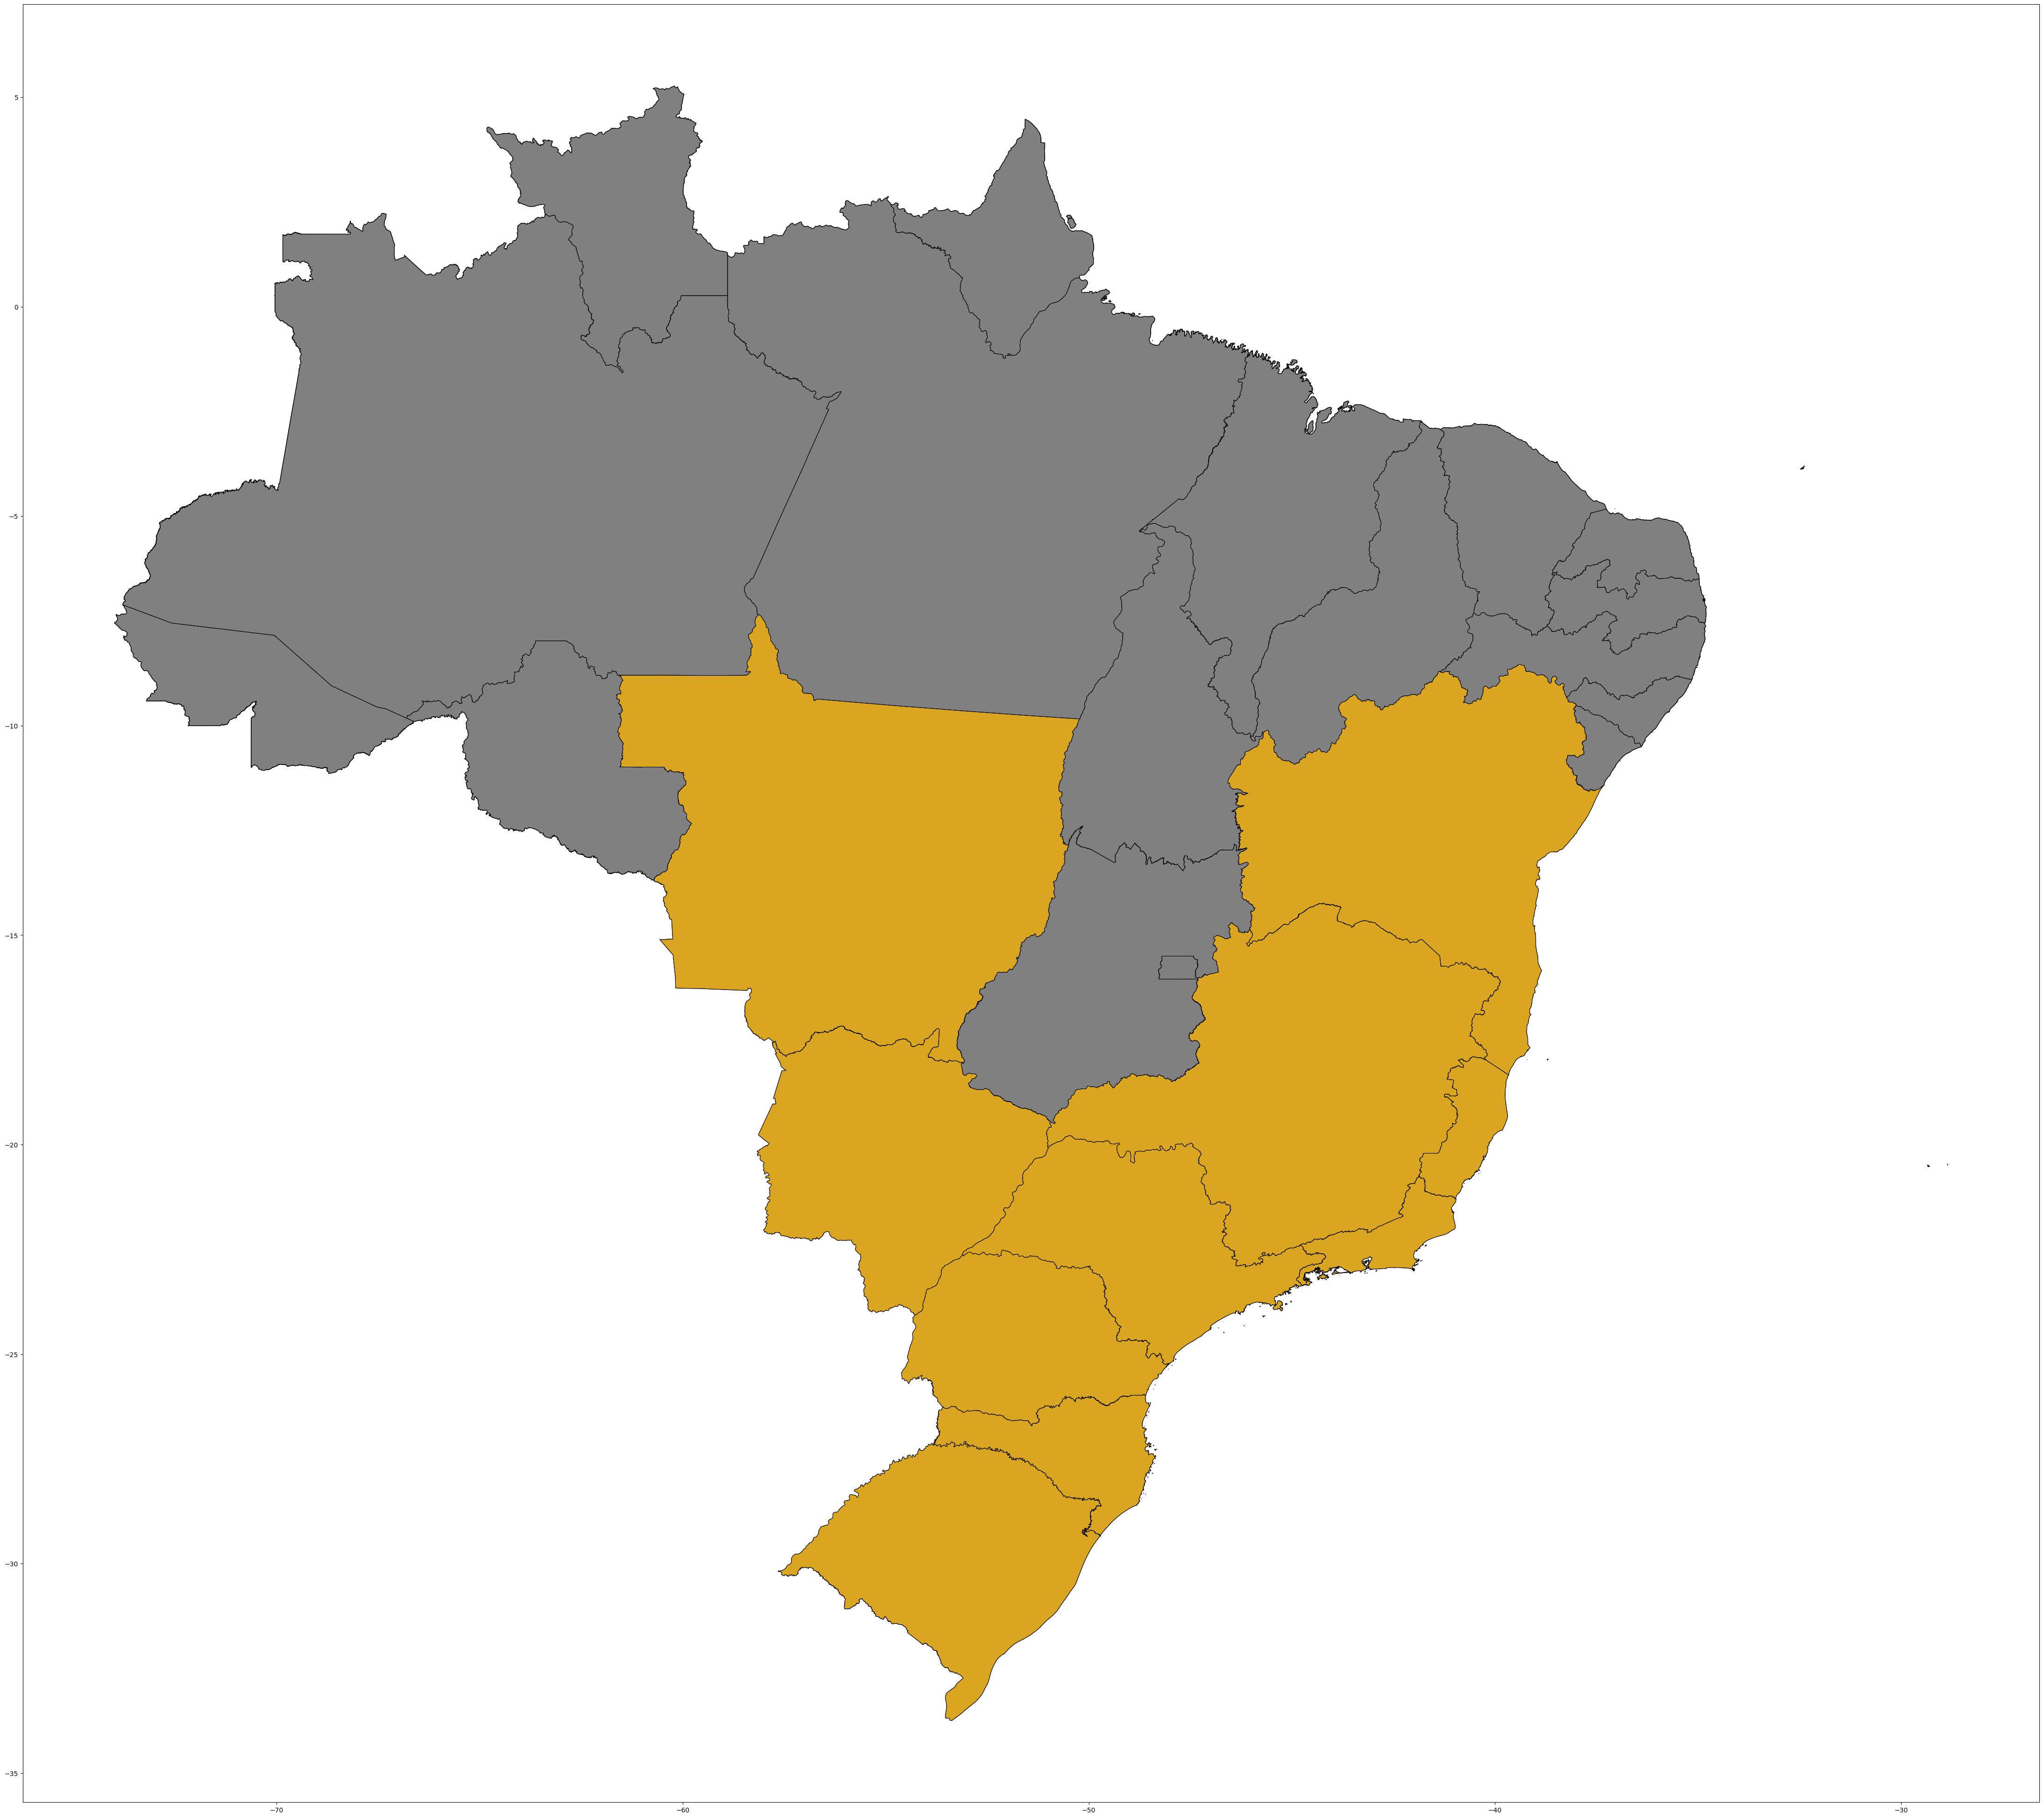

In [34]:
base = uf_br.plot(facecolor='grey', edgecolor='black',figsize=(100, 50))
ax = df_estado.plot(ax=base, facecolor='goldenrod', alpha=1, linewidth=2)


ax7= uf_br2.boundary.plot(ax=base, color='Black', linewidth=.7)
# legend = base.legend(proxy_artists, legend_labels, loc='upper right', prop={'size': 150})
